In [5]:
import numpy as np 
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
N=100
half_n=N//2
r=10
s=r/16
t=np.random.uniform(0,2*np.pi,half_n)
n=s*np.random.randn(half_n)
x,y=(r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b=-1,2
x=np.linspace(-12,12,half_n)
y=m*x+b+s*np.random.randn(half_n)
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X=np.vstack((X_circ,X_line))


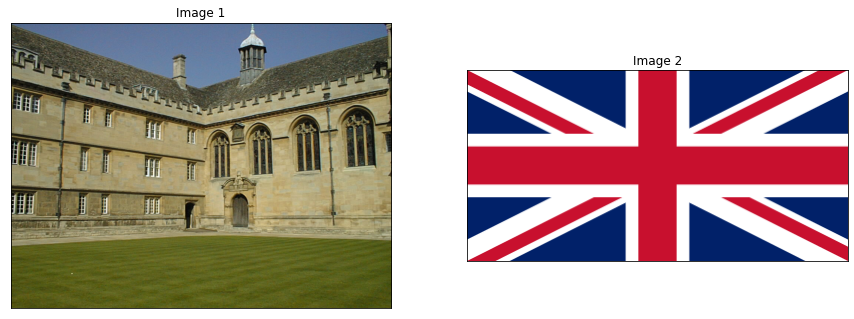

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im1=cv.imread('001.jpg')
im1=cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im2=cv.imread('flag.png')
im2=cv.cvtColor(im2,cv.COLOR_BGR2RGB)
plt.subplots(figsize=(15, 8))
plt.subplot(121),plt.imshow(im1),plt.title("Image 1"),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im2),plt.title("Image 2"),plt.xticks([]), plt.yticks([])
plt.show()

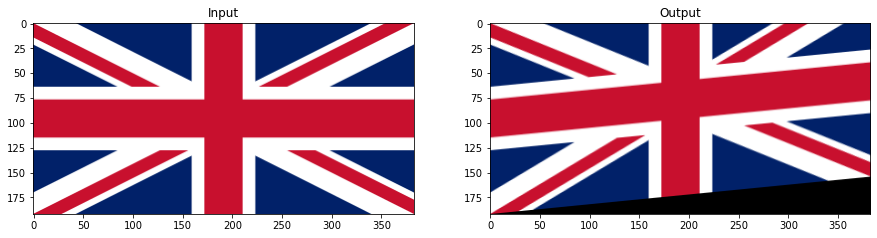

In [40]:
img = cv.imread('flag.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[0,0],[0,255],[255,255]])
pts2 = np.float32([[0,0],[0,255],[255,230]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplots(figsize=(15, 8))
plt.subplot(121),plt.imshow(img),plt.title('Input')#,plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Output')#,plt.xticks([]), plt.yticks([])
plt.show()

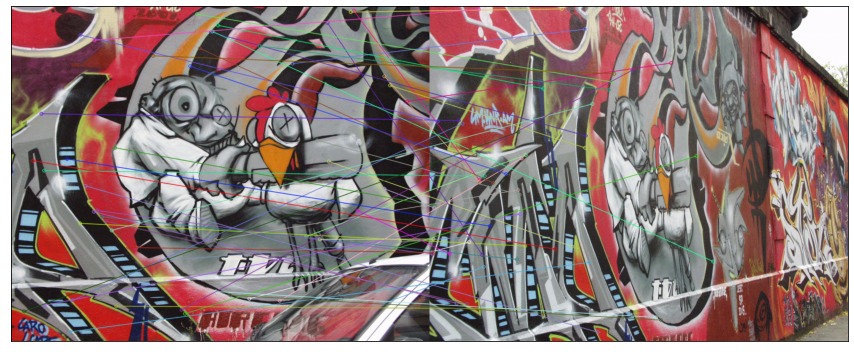

In [47]:
#Q3
import cv2
import matplotlib.pyplot as plt
img1=cv2.imread('img1.ppm')
img2=cv2.imread('img5.ppm')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.xticks([]), plt.yticks([])
plt.show()


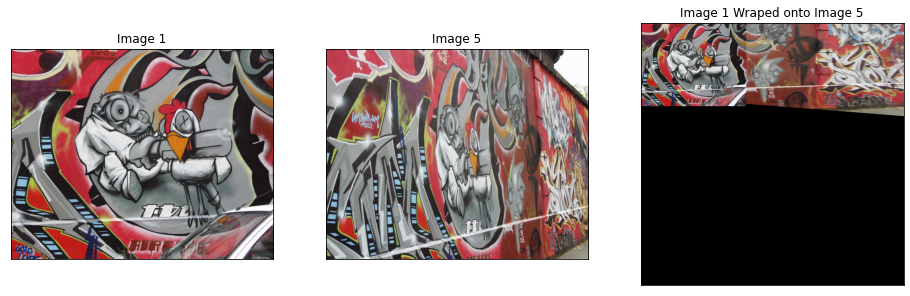

In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im1 = cv.imread('img1.ppm',cv.IMREAD_ANYCOLOR)
im1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
im5 = cv.imread('img5.ppm',cv.IMREAD_ANYCOLOR)
im5 = cv.cvtColor(im5,cv.COLOR_BGR2RGB)
H = []
with open(r'H1to5p') as f:
 H = np.array([[float(h) for h in line.split()] for line in f])
 
im1to5 = cv.warpPerspective(im5,np.linalg.inv(H),(2000,2000)) 
#im1to5[0:im1.shape[0],0:im1.shape[1]] = im1
fig, axes = plt.subplots(1,3, figsize=(16,16))
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1')
axes[1].imshow(im5,cmap='gray')
axes[1].set_title('Image 5')
axes[2].imshow(im1to5,cmap='gray')
axes[2].set_title('Image 1 Wraped onto Image 5')
for i in range(3):
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.show()


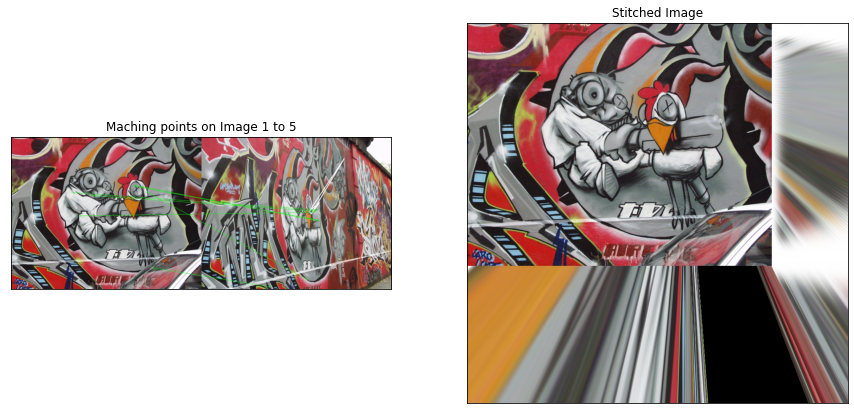

In [77]:
import numpy as np
import cv2

img1 = cv2.imread('img1.ppm',cv2.IMREAD_ANYCOLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('img5.ppm',cv2.IMREAD_ANYCOLOR)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
sift = cv2.SIFT_create()
keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Select the good matches using the ratio test
goodMatches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        goodMatches.append(m)
        
# Apply the homography transformation if we have enough good matches
MIN_MATCH_COUNT = 10
if len(goodMatches) > MIN_MATCH_COUNT:
    # Get the good key points positions
    sourcePoints = np.float32([keyPoints1[m.queryIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    destinationPoints = np.float32([keyPoints2[m.trainIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    # obtain the homography matrix
    M, mask = cv2.findHomography(sourcePoints, destinationPoints, method=cv2.RANSAC, ransacReprojThreshold=5.0)
    matchesMask = mask.ravel().tolist()
    # Apply the perspective transformation to the source image corners
    h = img1.shape[0]
    w = img1.shape[1]
    corners = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    transformedCorners = cv2.perspectiveTransform(corners, M)
    # Draw a polygon on the second image joining the transformed corners
    img2 = cv2.polylines(img2, [np.int32(transformedCorners)], True, (255, 255, 255), 2, cv2.LINE_AA)
else:
  
    matchesMask = None

drawParameters = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
result = cv2.drawMatches(img1, keyPoints1, img2, keyPoints2, goodMatches, None, **drawParameters)
im_warped = cv2.warpPerspective(img2, np.linalg.inv(M), (1000,1000))
im_warped[0:img1.shape[0], 0:img1.shape[1]] = img1
plt.subplots(figsize=(15, 12))
plt.subplot(121),plt.imshow(result),plt.title("Maching points on Image 1 to 5"),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_warped),plt.title("Stitched Image"),plt.xticks([]), plt.yticks([])
plt.show()

In [61]:
import numpy as np
import cv2
# Load the images in gray scale
img1 = cv2.imread('img1.ppm',cv2.IMREAD_ANYCOLOR)
#img1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('img5.ppm',cv2.IMREAD_ANYCOLOR)
#img2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
# Detect the SIFT key points and compute the descriptors for the two images
sift = cv2.SIFT_create()
keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)
# Create brute-force matcher object
bf = cv2.BFMatcher()
# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)
# Select the good matches using the ratio test
goodMatches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        goodMatches.append(m)
# Apply the homography transformation if we have enough good matches
MIN_MATCH_COUNT = 10
if len(goodMatches) > MIN_MATCH_COUNT:
    # Get the good key points positions
    sourcePoints = np.float32([keyPoints1[m.queryIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    destinationPoints = np.float32([keyPoints2[m.trainIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    # obtain the homography matrix
    M, mask = cv2.findHomography(sourcePoints, destinationPoints, method=cv2.RANSAC, ransacReprojThreshold=5.0)
    matchesMask = mask.ravel().tolist()
    # Apply the perspective transformation to the source image corners
    h = img1.shape[0]
    w = img1.shape[1]
    corners = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    transformedCorners = cv2.perspectiveTransform(corners, M)
    # Draw a polygon on the second image joining the transformed corners
    img2 = cv2.polylines(img2, [np.int32(transformedCorners)], True, (255, 255, 255), 2, cv2.LINE_AA)
else:
    #print("Not enough matches are found - %d/%d" % (len(goodMatches), MIN_MATCH_COUNT))
    matchesMask = None
# Draw the matches 
drawParameters = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
result = cv2.drawMatches(img1, keyPoints1, img2, keyPoints2, goodMatches, None, **drawParameters)
# Display the results
cv2.imshow('Homography', result)
#print(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

im4_warped = cv2.warpPerspective(img2, np.linalg.pinv(M), (1000,1000))
im4_warped[0:img1.shape[0], 0:img1.shape[1]] = img1
cv2.namedWindow("Image 4 Warped", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Image 4 Warped", im4_warped)
cv2.waitKey(0)
cv2.destroyAllWindows()